In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from PIL import Image
import numpy as np


In [10]:
def dataset_summary(folder_path):
    for folder in ["ttrain", "ttest"]:
        print(f"Dataset: {folder}")
        class_dirs = os.listdir(os.path.join(folder_path, folder))
        for class_dir in class_dirs:
            class_path = os.path.join(folder_path, folder, class_dir)
            # Check if the path is a directory before calling os.listdir()
            if os.path.isdir(class_path):
                num_images = len(os.listdir(class_path))
                print(f"  Class '{class_dir}': {num_images} images")
        print("\n")

dataset_summary('/content/leprosy_detection')

Dataset: ttrain
  Class 'leprosy': 929 images
  Class 'nonleprosy': 303 images


Dataset: ttest
  Class 'leprosy': 191 images
  Class 'nonleprosy': 116 images




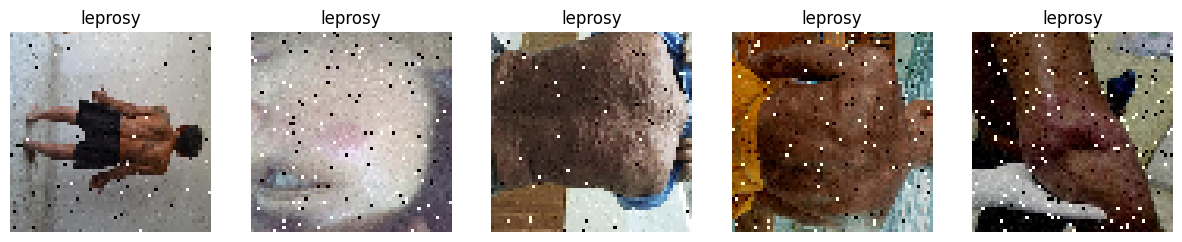

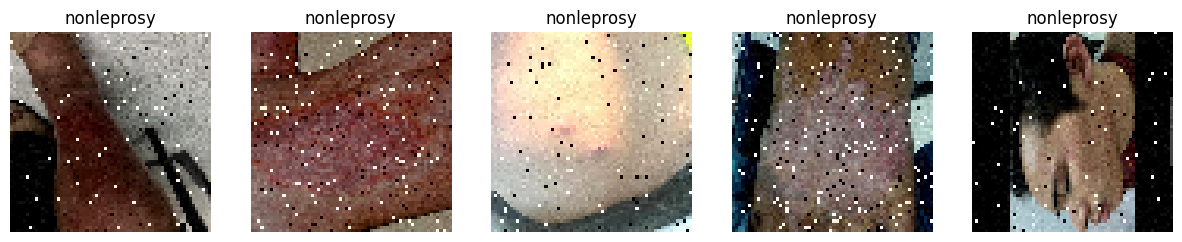

In [16]:
def display_sample_images(folder_path, class_name, num_images=5):
    class_folder = os.path.join(folder_path, "ttrain", class_name)
    images = os.listdir(class_folder)
    plt.figure(figsize=(15, 5))
    for i in range(min(num_images, len(images))):
        img_path = os.path.join(class_folder, images[i])
        img = load_img(img_path, target_size=(64, 64))
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.show()

# Display sample images for each class
display_sample_images('/content/leprosy_detection', "leprosy")
display_sample_images('/content/leprosy_detection', "nonleprosy")


In [22]:


def analyze_image_shapes(folder_path):
    shapes = []
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')  # Add more if needed

    for folder in ["ttrain", "ttest"]:
        class_dirs = os.listdir(os.path.join(folder_path, folder))
        for class_dir in class_dirs:
            class_path = os.path.join(folder_path, folder, class_dir)
            for image_file in os.listdir(class_path):
                img_path = os.path.join(class_path, image_file)
                # Check if it's a file and has an image extension
                if os.path.isfile(img_path) and image_file.lower().endswith(image_extensions):
                    with Image.open(img_path) as img:
                        shapes.append(img.size)
    print(f"Unique image dimensions: {set(shapes)}")

analyze_image_shapes('/content/leprosy_detection')

Unique image dimensions: {(416, 416)}


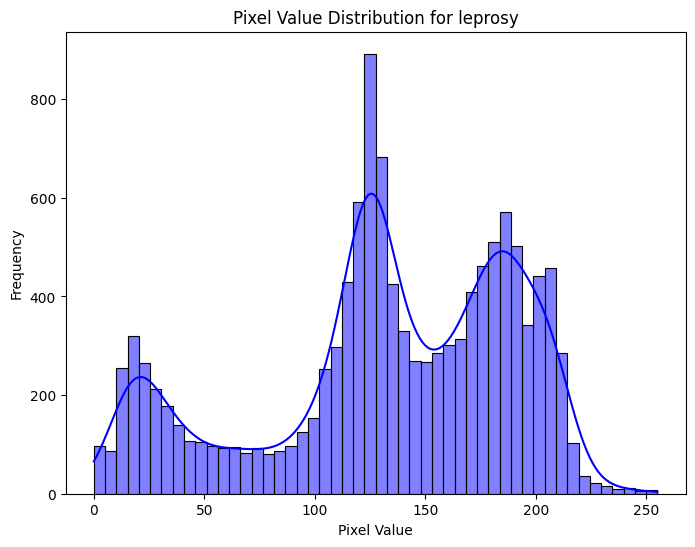

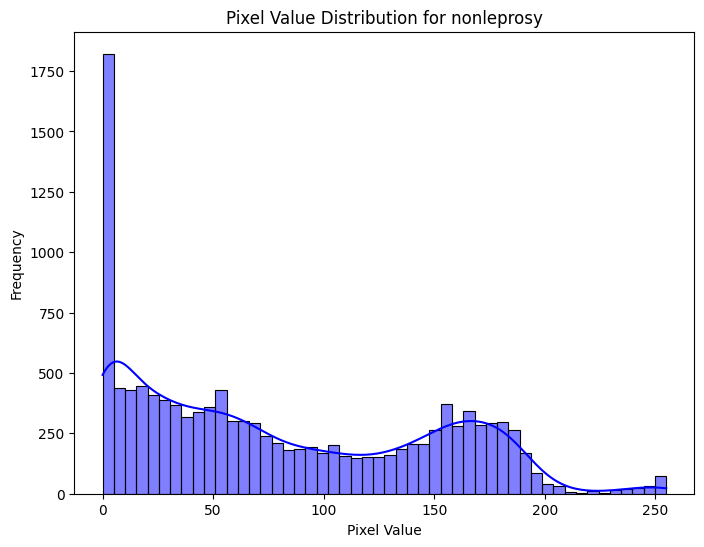

In [25]:
def plot_pixel_distribution(folder_path, class_name):
    class_folder = os.path.join(folder_path, "ttrain", class_name)
    sample_image = os.listdir(class_folder)[0]
    img_path = os.path.join(class_folder, sample_image)
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img).flatten()

    plt.figure(figsize=(8, 6))
    sns.histplot(img_array, kde=True, bins=50, color="blue")
    plt.title(f"Pixel Value Distribution for {class_name}")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

plot_pixel_distribution('/content/leprosy_detection', "leprosy")
plot_pixel_distribution('/content/leprosy_detection', "nonleprosy")


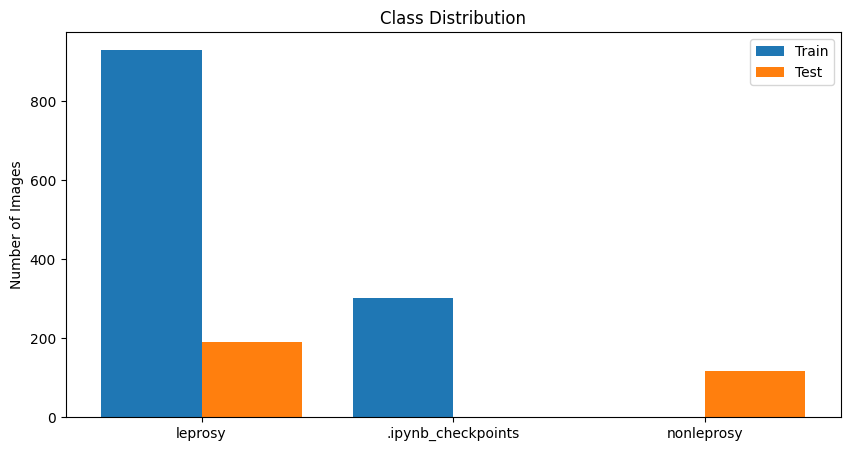

In [27]:
def plot_class_distribution(folder_path):
    train_counts = []
    test_counts = []

    for folder, counts in [("ttrain", train_counts), ("ttest", test_counts)]:
        class_dirs = os.listdir(os.path.join(folder_path, folder))
        # Ensure 'class_dirs' is not empty before iterating
        if class_dirs:
            for class_dir in class_dirs:
                class_path = os.path.join(folder_path, folder, class_dir)
                counts.append(len(os.listdir(class_path)))
    # Get labels from the folder with the most classes
    train_labels = os.listdir(os.path.join(folder_path, "ttrain"))
    test_labels = os.listdir(os.path.join(folder_path, "ttest"))
    labels = train_labels if len(train_labels) >= len(test_labels) else test_labels

    # Pad shorter counts with 0 to match the length of labels
    train_counts += [0] * (len(labels) - len(train_counts))
    test_counts += [0] * (len(labels) - len(test_counts))

    plt.figure(figsize=(10, 5))
    x = np.arange(len(labels))
    plt.bar(x - 0.2, train_counts, 0.4, label="Train")
    plt.bar(x + 0.2, test_counts, 0.4, label="Test")
    plt.xticks(x, labels)
    plt.title("Class Distribution")
    plt.ylabel("Number of Images")
    plt.legend()
    plt.show()

plot_class_distribution('/content/leprosy_detection')

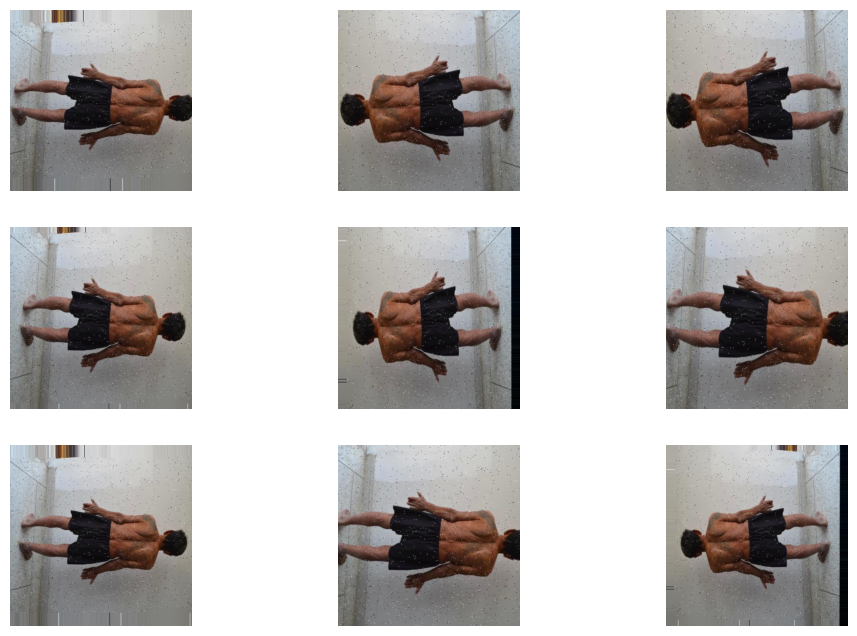

In [28]:
def visualize_augmentation(folder_path, class_name):
    class_folder = os.path.join(folder_path, "ttrain", class_name)
    img_path = os.path.join(class_folder, os.listdir(class_folder)[0])
    img = load_img(img_path)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    datagen = ImageDataGenerator(
        rescale=1.0/255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    plt.figure(figsize=(12, 8))
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(batch[0])
        plt.axis('off')
        if i >= 8:  # Show only 9 images
            break
    plt.show()

visualize_augmentation('/content/leprosy_detection', "leprosy")


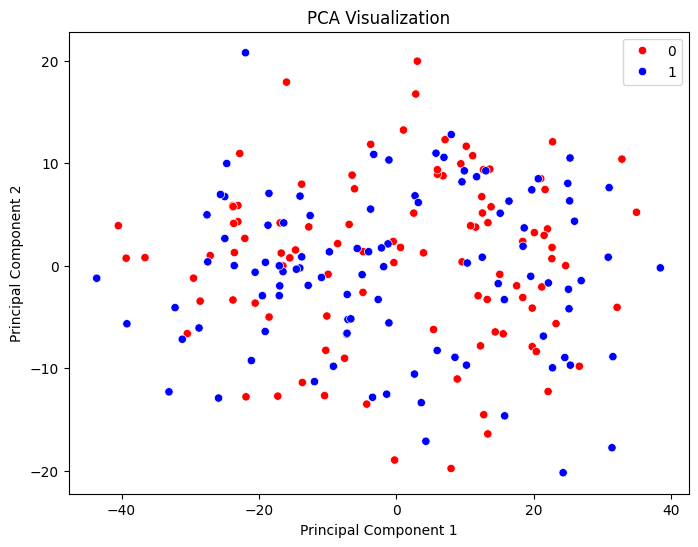

In [30]:
from sklearn.decomposition import PCA

def visualize_with_pca(folder_path, num_samples=100):
    data, labels = [], []
    for class_label, class_name in enumerate(["leprosy", "nonleprosy"]):
        class_folder = os.path.join(folder_path, "ttrain", class_name)
        for image_file in os.listdir(class_folder)[:num_samples]:
            img_path = os.path.join(class_folder, image_file)
            img = load_img(img_path, target_size=(64, 64))
            img_array = img_to_array(img).flatten()
            data.append(img_array)
            labels.append(class_label)

    data = np.array(data) / 255.0
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette=["red", "blue"])
    plt.title("PCA Visualization")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

visualize_with_pca('/content/leprosy_detection')


In [2]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image


# 1. Data Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    shear_range=0.2,  # Apply random shearing
    zoom_range=0.2,   # Apply random zoom
    horizontal_flip=True  # Apply horizontal flipping
)

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Only normalize for test data

# Create the training and testing datasets
training_set = train_datagen.flow_from_directory(
    '/content/leprosy_detection/ttrain',  # Path to training data
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,  # Batch size for training
    class_mode='binary'  # Binary classification
)

test_set = test_datagen.flow_from_directory(
    '/content/leprosy_detection/ttest',  # Path to test data
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,  # Batch size for testing
    class_mode='binary'  # Binary classification
)

# 2. Building the CNN Model
cnn = tf.keras.models.Sequential()

# Add convolutional and pooling layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flatten the feature maps
cnn.add(tf.keras.layers.Flatten())

# Fully connected dense layers
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# 3. Compile the Model
cnn.compile(
    optimizer='adam',  # Adam optimizer
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Monitor accuracy during training
)

# 4. Training the Model
cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25  # Number of epochs
)

# 5. Testing the Model on a New Image
def predict_image(image_path):
    test_image = image.load_img(image_path, target_size=(64, 64))  # Load and resize the image
    test_image = image.img_to_array(test_image)  # Convert to a numpy array
    test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
    result = cnn.predict(test_image)  # Get the prediction
    if result[0][0] >= 0.5:
        return "Not Leprosy"
    else:
        return "Leprosy"

# Example Usage
image_path = '/content/leprosy_detection/valid/Leprosy-03_jpg.rf.59f48a4462daea1bae789463b2927d3c.jpg'
prediction = predict_image(image_path)
print(f"The model predicts: {prediction}")


Found 1231 images belonging to 2 classes.
Found 305 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - accuracy: 0.7244 - loss: 0.5914 - val_accuracy: 0.6230 - val_loss: 0.7925
Epoch 2/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.7693 - loss: 0.5152 - val_accuracy: 0.6230 - val_loss: 0.6762
Epoch 3/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.7585 - loss: 0.5219 - val_accuracy: 0.6328 - val_loss: 0.5841
Epoch 4/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7829 - loss: 0.4684 - val_accuracy: 0.6230 - val_loss: 0.8323
Epoch 5/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.7828 - loss: 0.4842 - val_accuracy: 0.6984 - val_loss: 0.5470
Epoch 6/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.7806 - loss: 0.4744 - val_accuracy: 0.6557 - val_loss: 0.5918
Epoch 7/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7856 - loss: 0.4891 - val_accuracy: 0.6852 - val_loss: 0.5322
Epoch 8/25
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.7885 - loss: 0.4770 - val_accuracy: 0.7541 - val_los